# Experiment ToolKit Documendation - For Developers
This notebook aims to explain the Experiment ToolKit for developers only, and it's usage easily.

## Introduction - What is the Experiment ToolKit?  

The experiment toolkit is designed to handle experiments data and metadata inside projects. The user can create and load an experiment in just a few simple steps (It is recommended to reach the [user documentation](hera/measurements/experiment/ExperimentDocumentationUsers.ipynb) prior to reading this documentation). 
It is also useful because it does not require the user to remember where all the data paths and metadata of experiments are. Inside a project, there may be a high number of experiments that the user wants to get to, but he doesn't know where those experiments are stored and where their metadata is. For overcoming this problem, all he needs to do is to load an experiment toolkit which holds all the data he needs. 

### Classes Inherations Diagram
When dealing with the experiment toolKit , we have two classes which we focus on: **'experimentHome'** and **'experimentSetupWithData'**, which will be detailed below with a simple example.  
But first, for making things more clear, lets look at the structure of classes inherations related to experiments:

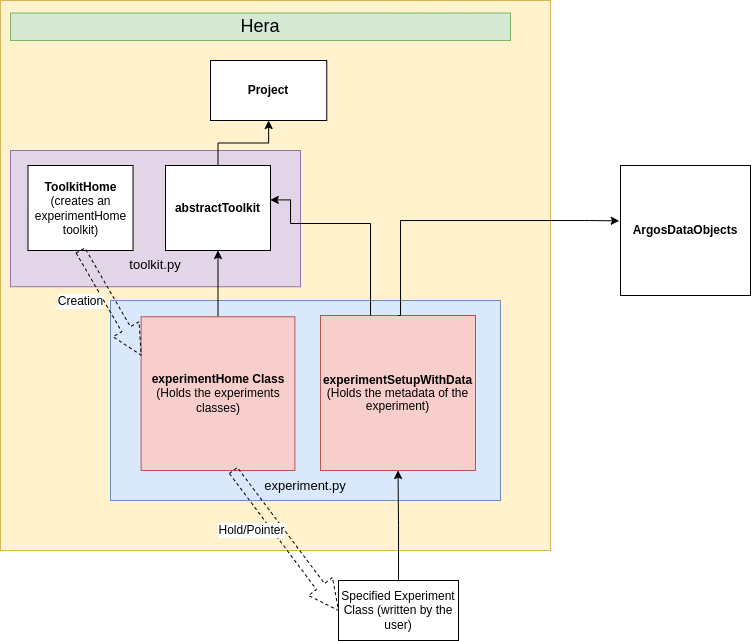

In [1]:
from IPython.display import Image
Image(filename="ExperimentToolKit.drawio.png")

### experimentSetupWithData Class  
The purpose of this class is to hold the metadata (also called Measurements documents) of a particular experiment.  
The metadata containts fields such as: experiment name, device type, path to the data of the device, the data format in which the real data  is stored and etc. With the use of the metadata of an experiment, we can reach the data of the device and also apply queries on it.  
As you can see in the diagram, the Specified Experiment Class inherates from this class. This class can be implemented by the user, and it will have specific functions for the experiment itself (the programmer has nothing to do with this). This class can also be empty, if the user has no need for writing specific functions for the experiment. This class is also called DataSource, in the metadata of the experiments.

### experimentHome Class  
The purpose of this class is simply to hold pointers (paths) to classes of experiments we wish to use. Its purpose is to give us access to these classes without having to remember the paths to those the classes. It can be created by the toolkit Home which function as a factory design pattern for creating different kind of toolkits.  
We will soon see an example for all this process.

## **Diagram Description**:  
- ToolKitHome: General class for creating different types of toolkits
- experimentHomeClass: The specific toolkit for holding experiments classes. Inherates from abstractToolKit.
- experimentSetupWithData: Holds the metadata of a specific experiment. Inherates from abstractToolKit.
- Specified Experiment Class: This class is written by the user, and it is specified for the experiment the user is dealing with (can also be an empty class). Inherates from experimentSetupWithData.

The metadata is received inisde a zip file, which is parsed by the experimentSetupWithData class.

## Explanation using an Example

As you saw is the user documendation example, when the user creates a project inside a folder,few things happen:  
- 'runtimeExperimentData' folder is created with a JSON configuration file and the zip containing the metadata.
- 'code' folder is created with the Specified Experiment class inside it for the user to impliment.
- 'data' folder is created. The experiment data of each device will sit there.

Behind the scenes, a few steps happend which will be detailed here. The whole process can be summarize by 3 steps:  
1) A parser class reads the zip metadata.
2) Creation of a Repository JSON file with the metadata.
3) Adding the metadata documents to the project.

### 1) Parsing the metadata  

The zip metadata is parsed by a dedicated class **'ExperimentZipFile'**, which is imported by the following cell:

In [3]:
from argos.experimentSetup.dataObjects import ExperimentZipFile

The class receives a path to a zip file and parse it automatically:

In [7]:
metadata = ExperimentZipFile('../metadataFiles/HaifaFluxes2014.zip')

We reach the metadata table with the following cell:

In [9]:
metadata.trialSet['Measurements']['Measurement'].entitiesTable("design")

,locationName,latitude,longitude,height,stationName,entityType,entityName
0,OSMMap,32.789483,35.040617,9.0,Check_Post,Sonic,sonic01
1,OSMMap,32.786267,34.985917,6.0,Horev_7,Sonic,sonic07
2,OSMMap,32.825250,34.969267,6.0,Gordon,Sonic,sonic04
3,OSMMap,32.797700,34.973817,6.0,Gan-Margalit,Sonic,sonic02
4,OSMMap,32.825250,34.969267,16.0,Gordon,Sonic,sonic05
5,OSMMap,32.801133,34.991583,6.0,Hugim,Sonic,sonic09
6,OSMMap,32.789950,35.007183,9.0,Grand_Canyon,Sonic,sonic06
7,OSMMap,32.797700,34.973817,16.0,Gan-Margalit,Sonic,sonic03
8,OSMMap,32.786267,34.985917,16.0,Horev_7,Sonic,sonic08
9,OSMMap,32.839250,35.083000,9.0,K_Motskin,Sonic,sonic11


Using the fields in the table, we can decide which metadata field we wish to save inside the project.   
Currently, we only use the perDevice, entityType and entityName fields.

### 2) Repository creation  

Using the fields we want to use, we create a repository json file.  
Make sure to reach the [Repository documentation](https://github.com/KaplanOpenSource/hera/blob/master/hera/doc/jupyter/Repository.ipynb) for more details.

The repository JSON file should be by the following format:

```javascript
{
    "experiment": {
        "DataSource": {
            "EXPERIMENT_NAME": {
                "isRelativePath": "True",
                "item": {
                    "dataSourceName": "EXPERIMENT_NAME",
                    "resource": "",
                    "experimentPath": "PATH_TO_EXPERIMENT_DIRECTORY",
                    "dataFormat": "parquet",
                    "overwrite": true/false
                }
            }
        },
        "Measurements": {
            "DEVICE_TYPE_NAME": {
                "isRelativePath": "True",
                "item": {
                    "type": "Experiment_rawData",
                    "resource": "PATH_TO_EXPERIMENT_DIRECTORY/data/DEVICE_TYPE_NAME",
                    "dataFormat": "parquet",
                    "desc": {
                        "deviceType": "DEVICE_TYPE",
                        "experimentName": "EXPERIMENT_NAME",
                        "deviceName": "DEVICE_NAME",
                        "perDevice": true/false
                    }
                }
            },
            "DEVICE_TYPE_NAME": {
                "isRelativePath": "True",
                "item": {
                    "type": "Experiment_rawData",
                    "resource": "PATH_TO_EXPERIMENT_DIRECTORY/data/DEVICE_TYPE_NAME",
                    "dataFormat": "parquet",
                    "desc": {
                        "deviceType": "DEVICE_TYPE",
                        "experimentName": "EXPERIMENT_NAME",
                        "deviceName": "DEVICE_NAME",
                        "perDevice": true/false
                    }
                }
            }
            ...
            ...
            ...
        }
    }
}
```

Decription:  
- **EXPERIMENT_NAME** should be changed to the experiment name. For example Haifa2014.
- **PATH_TO_EXPERIMENT_DIRECTORY** should be changed to the experiment directory. For example /home/experiment/haifa2014.
- **DEVICE_TYPE_NAME** should be changed to the device type or device name. It depends if the data is stored per device or not in this case.  
For example, if the data is stored per device for the 'Sonic' device, all 'Sonic' devices data in the experiment will be stored in one file. In this case, DEVICE_TYPE='Sonic' and resource= "PATH_TO_EXPERIMENT_DIRECTORY/data/Sonic".  
In another case, where the data is not stored per deivce, DEVICE_TYPE_NAME could be 'Sonic12'. Then resource=PATH_TO_EXPERIMENT_DIRECTORY/data/Sonic12. Here each device has a file stored in the data directory.

## 3) Adding the metadata to a project - Manually

Whenever the user creates a project using the CLI, all the metadata inside the repository file is added also. It is all done using the **experimentHome Class**.

First we create a new project with a specified name and load the experimentHome Class:

In [11]:
from hera import toolkitHome

projectName = 'theNewProject'
experimentHome = toolkitHome.getToolkit(toolkitName=toolkitHome.EXPERIMENT, projectName=projectName)

Now we have an instance of the experimentHome class and an empty project with the name 'theNewProject'. 

We can now add a datasource to the project with the **addDataSource** command. The addDataSource function receives the arguments dataSourceName,resource,format and etc. A datasource could look like that:

In [12]:
datasource = {'Haifa2017': {'isRelativePath': 'True',
  'item': {'dataSourceName': 'Haifa2017',
   'resource': '',
   'experimentPath': '/home/experiments/Haifa2017',
   'dataFormat': 'parquet',
   'overwrite': 'True'}}}

We can add the data source like that:

In [13]:
experimentHome.addDataSource(dataSourceName=datasource['Haifa2017']['item']['dataSourceName'],
                            resource=datasource['Haifa2017']['item']['resource'],
                            dataFormat=datasource['Haifa2017']['item']['dataFormat'])

<Measurements: {
    "_cls": "Metadata.Measurements",
    "projectName": "theNewProject",
    "desc": {
        "toolkit": "experimentToolKit",
        "datasourceName": "Haifa2017",
        "version": [
            0,
            0,
            1
        ]
    },
    "type": "ToolkitDataSource",
    "resource": "",
    "dataFormat": "parquet"
}>

Note that we can add other fields aswell that we wish to:

In [14]:
experimentHome.addDataSource(dataSourceName='DataSource12345',
                            resource='resource12',
                            dataFormat='PARQUET',
                            hello='this is a non relevant argument for now',
                            experimentPath='path to the experiment')

<Measurements: {
    "_cls": "Metadata.Measurements",
    "projectName": "theNewProject",
    "desc": {
        "hello": "this is a non relevant argument for now",
        "experimentPath": "path to the experiment",
        "toolkit": "experimentToolKit",
        "datasourceName": "DataSource12345",
        "version": [
            0,
            0,
            1
        ]
    },
    "type": "ToolkitDataSource",
    "resource": "resource12",
    "dataFormat": "PARQUET"
}>

The same, we can do with the device Measurements, using the function **addMeasurementsDocument**. Here the function receives the arguments:  
- resource - path to data parquet of device
- dataFormat - always will be PARQUET
- type - always Experiment_rawData
- desc- dictionary with the metadata we wish to store.

Let's see an example where we have on device 'Sonic' which is stored perDevice, and two TRH devices which are not stored perDevice:

In [18]:
measurements_sonic = {
    "Sonic": {
                "isRelativePath": "True",
                "item": {
                    "type": "Experiment_rawData",
                    "resource": "/home/experiments/Haifa2017/data/Sonic",
                    "dataFormat": "parquet",
                    "desc": {
                        "deviceType": "Sonic",
                        "experimentName": "Haifa2017",
                        "deviceName": "",
                        "perDevice": True
                    }
                }
            }
}


measurements_trh1 = {
    "TRH1": {
                "isRelativePath": "True",
                "item": {
                    "type": "Experiment_rawData",
                    "resource": "/home/experiments/Haifa2017/data/TRH1",
                    "dataFormat": "parquet",
                    "desc": {
                        "deviceType": "TRH",
                        "experimentName": "Haifa2017",
                        "deviceName": "TRH1",
                        "perDevice": False
                    }
                }
            }
}


measurements_trh2 = {
    "TRH2": {
                "isRelativePath": "True",
                "item": {
                    "type": "Experiment_rawData",
                    "resource": "/home/experiments/Haifa2017/data/TRH2",
                    "dataFormat": "parquet",
                    "desc": {
                        "deviceType": "TRH",
                        "experimentName": "Haifa2017",
                        "deviceName": "TRH2",
                        "perDevice": False
                    }
                }
            }
}


In [19]:
experimentHome.addMeasurementsDocument(
    resource=measurements_sonic['Sonic']['item']['resource'],
    desc=measurements_sonic['Sonic']['item']['desc']
)

experimentHome.addMeasurementsDocument(
    resource=measurements_trh1['TRH1']['item']['resource'],
    desc=measurements_trh1['TRH1']['item']['desc']
)
experimentHome.addMeasurementsDocument(
    resource=measurements_trh2['TRH2']['item']['resource'],
    desc=measurements_trh2['TRH2']['item']['desc']
)


<Measurements: {
    "_cls": "Metadata.Measurements",
    "projectName": "theNewProject",
    "desc": {
        "deviceType": "TRH",
        "experimentName": "Haifa2017",
        "deviceName": "TRH2",
        "perDevice": false
    },
    "type": "",
    "resource": "/home/experiments/Haifa2017/data/TRH2",
    "dataFormat": "string"
}>

When the user creates a new project, we basicly go through all repositories and store all datasources and meassurements inside each one of them to the new project, all using **addDataSource** and **addMeasurementsDocument**.